In [101]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [102]:
# Leitura dos dados.csv
data = pd.read_csv('soybean.csv')
data.head(5)

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [103]:
# Quantidade de linhas e colunas dos Dados
data.shape

(683, 36)

Análisando domínio de algumas colunas

In [104]:
groupby_date = data.groupby(data['date']).size()
groupby_date

date
?              1
april         26
august       131
july         118
june          93
may           75
october       90
september    149
dtype: int64

In [105]:
groupby_plant_stand = data.groupby(data['plant-stand']).size()
groupby_plant_stand

plant-stand
?             36
lt-normal    293
normal       354
dtype: int64

In [106]:
groupby_precip = data.groupby(data['precip']).size()
groupby_precip

precip
?           38
gt-norm    459
lt-norm     74
norm       112
dtype: int64

In [107]:
# Identificar todas as colunas com o valor inconsistente '?' e substituir pela moda
for column in data.columns:
    if "?" in data[column].values:
        moda = data[column][data[column] != "?"].mode()[0]
        data[column] = data[column].replace("?", moda)

# Verificar o resultado
for column in data.columns:
    if "?" in data[column].values:
        print('Valor Inconsistente')

In [108]:
# Iterar pelas colunas do DataFrame e aplicar a técnica label enconding
labelencoder = LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])
data.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,5,1,0,2,1,3,0,1,1,1,...,0,3,3,1,0,0,1,0,1,10
1,1,1,0,2,1,2,1,2,0,0,...,0,3,3,1,0,0,1,0,1,10
2,2,1,0,2,1,3,1,2,0,2,...,0,3,3,1,0,0,1,0,1,10
3,2,1,0,2,1,3,1,2,1,0,...,0,3,3,1,0,0,1,0,1,10
4,5,1,0,2,1,2,1,1,1,2,...,0,3,3,1,0,0,1,0,1,10


In [109]:
# Separação dos variaveis independentes, e da varíavel alvo
X = data.iloc[:,:35].values
y = data.iloc[:, 35].values

In [110]:
# Aplicar a técnica de OneHotEncoder na variavel alvo
dummy_variable = to_categorical(y)
dummy_variable

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
# Separação de 20% dos dados para teste e 80% para treino
X_train,X_test,y_train,y_test = train_test_split(X, dummy_variable, test_size= 0.20, random_state=0)
print(len(X_train), len(y_train), len(X_test), len(y_test))

546 546 137 137


In [ ]:
# O código fornecido cria e treina uma rede neural com múltiplas camadas ocultas
classifier = Sequential()

# Primeira camada oculta
classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=35))
classifier.add(Dropout(0.2))  # Regularização

# Segunda camada oculta
classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.2))

# Terceira camada oculta
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.2))

# Camada de saída
classifier.add(Dense(units=19, kernel_initializer='uniform', activation='softmax'))

# Compilação
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento da rede neural

classifier.fit(X_train,y_train, epochs = 1500, batch_size = 10, validation_data = (X_test, y_test))


Epoch 1/1500
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1201 - loss: 2.9316 - val_accuracy: 0.1387 - val_loss: 2.7232
Epoch 2/1500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1489 - loss: 2.6531 - val_accuracy: 0.1387 - val_loss: 2.6200
Epoch 3/1500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1197 - loss: 2.6154 - val_accuracy: 0.1022 - val_loss: 2.5738
Epoch 4/1500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1165 - loss: 2.5489 - val_accuracy: 0.1022 - val_loss: 2.4804
Epoch 5/1500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1574 - loss: 2.3868 - val_accuracy: 0.1533 - val_loss: 2.4011
Epoch 6/1500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1669 - loss: 2.2982 - val_accuracy: 0.1606 - val_loss: 2.3714
Epoch 7/1500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1684 - loss: 2.3336 - val_accuracy: 0.1898 - val_loss: 2.3267
Epoch 8/1500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1867 - loss: 2.2368 - val_accuracy: 0.

In [113]:
# Realizando as previsões 
y_predict = classifier.predict(X_test)
y_predict = (y_predict > 0.5)
y_predict

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

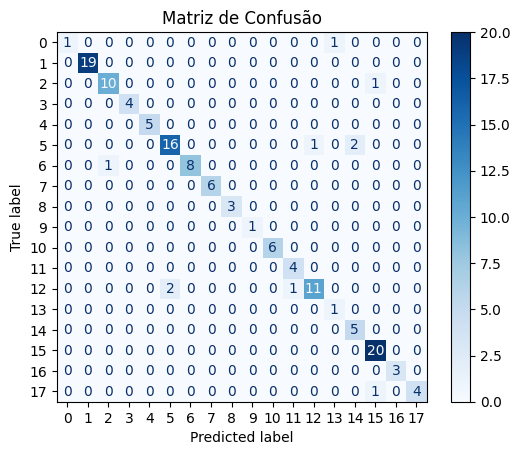

In [114]:
# Como é um problema com dezenove saídas, precisamos buscar a posição que possui o maior valor (são retornados 19 valores)
y_teste_matrix = [np.argmax(t) for t in y_test]
y_predict_matrix = [np.argmax(t) for t in y_predict]

# Gera a matriz de confusão
matriz_confusao = confusion_matrix(y_teste_matrix, y_predict_matrix)

# Exibe a matriz de confusão de forma visual
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

In [115]:
# Análise dos resultados do modelo
print(classification_report(y_test, y_predict, zero_division=0))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00        19
           2       0.91      0.91      0.91        11
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       0.89      0.84      0.86        19
           6       1.00      0.89      0.94         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         6
          11       0.80      1.00      0.89         4
          12       0.92      0.79      0.85        14
          13       0.50      1.00      0.67         1
          14       0.71      1.00      0.83         5
          15       0.91      1.00      0.95        20
          16       0.00      0.00      0.00         0
          17       1.00    